# **Importar Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el identificador de la hoja de cálculo de Google Sheets
Id_planilla = '1Xk6u_ITmRTYqSAHy8Bdt_vzSKjhJkMKBu44sqBS8bfM'

# Construimos la URL para acceder a la hoja de cálculo en formato CSV
URL = f'https://docs.google.com/spreadsheets/d/{Id_planilla}/gviz/tq?tqx=out:csv&sheet='


## **Obtener los datos**

In [ ]:
#Tabla sales_in_Paraguay
df_ventas = pd.read_csv(URL + 'sales_in_Paraguay')

#Tabla distributors_profiles
df_distribuidores = pd.read_csv(URL + 'distributors_profiles', thousands=".")

#Tabla exports_to_Paraguay
df_exportaciones = pd.read_csv(URL + 'exports_to_Paraguay', thousands=".")

#Tabla locations_profiles
df_ubicaciones = pd.read_csv(URL + 'locations_profiles')

# **Limpiar y Modelar de Datos**

## Tabla sales_in_Paraguay

In [ ]:
print("Verificar el tipo de dato inicial:\n")
display(df_ventas.dtypes)

Verificar el tipo de dato inicial:



distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

In [ ]:
print("\nTabla Sales in Paraguay Original:\n")
display(df_ventas.head())


Tabla Sales in Paraguay Original:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,1104.0,"$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,1384.0,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379.0,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,1599.0,"$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


In [ ]:
# Renombrar la columna 'distributor' a 'id' en el DataFrame 'df_ventas'
df_ventas.rename(columns={'distributor': 'id'}, inplace=True)

# Eliminar la última fila del DataFrame
df_ventas = df_ventas.drop(df_ventas.index[-1])

# Convertir la columna 'id' a tipo de datos entero
df_ventas['id']= df_ventas['id'].astype(int)

# Selecciono la lista de colummnas a transformar
columnVentas=list(df_ventas.columns[1:13])

# Realizar las transformaciones en las columnas de tipo object
for col in columnVentas:

  # Eliminar el símbolo '$'
  df_ventas[col] = df_ventas[col].str.replace('$', '')

  # Eliminar los puntos '.'
  df_ventas[col] = df_ventas[col].str.replace('.', '')

  # Reemplazar las comas ',' por puntos '.'
  df_ventas[col] = df_ventas[col].str.replace(',', '.')

  # Convertir la columna a float
  df_ventas[col] = df_ventas[col].astype(float)

#  Mostrar dos decimales
pd.options.display.float_format = '{:.2f}'.format

print("\nTabla Sales in Paraguay:\n")
display(df_ventas.head())


Tabla Sales in Paraguay:



,id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.00,55872547.77,18050385.12,178927599.01,2788.80,54510203.61,20982.80
1,1104,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.00,46239695.30,33102840.61,35563624.11,599.01,9945371.16,187306.41
2,1384,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.00,21883374.92,78927599.01,1346769.34,0.00,36603264.50,300838.58
3,379,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.00,79358855.35,32067534.68,53172624.14,2922.94,33102840.61,579748.25
4,1599,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.00,53172624.14,57187306.41,1155872547.77,203.61,43512922.94,730734.07


In [ ]:
# Verificar el número de duplicados en la columna 'ID'
num_duplicados_id = df_ventas.duplicated().sum()
print(f"Número de id duplicados: {num_duplicados_id}")


Número de id duplicados: 0


In [ ]:
print("Verificar el tipo de dato final:\n")
display(df_ventas.dtypes)

Verificar el tipo de dato final:



id              int64
Rubber        float64
Brass         float64
Vinyl         float64
Granite       float64
Stone         float64
Brick         float64
Aluminum      float64
Glass         float64
Plexiglass    float64
Steel         float64
Wood          float64
Plastic       float64
dtype: object

## Tabla distributors_profiles


In [ ]:
print("Verificar el tipo de dato inicial:\n")
display(df_distribuidores.dtypes)

Verificar el tipo de dato inicial:



id                                  float64
distributor                          object
distributor activities               object
years in the construction market      int64
dtype: object

In [ ]:
print("\n Tabla Distributors Profiles:\n")
display(df_distribuidores.head())


 Tabla Distributors Profiles:



,id,distributor,distributor activities,years in the construction market
0,565.00,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1384.00,Balistreri LLC,"construction materials import/distribution, si...",22
2,1183.00,Brekke-Stiedemann,construction materials import/distribution,13
3,1526.00,Collins LLC,construction materials import/distribution,12
4,29.00,Cummings-Ward,"construction materials import/distribution, ir...",23


In [ ]:
# Eliminar todas las filas con al menos un valor nulo en cualquier columna
df_distribuidores = df_distribuidores.dropna()

# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['years in the construction market']
df_distribuidores = df_distribuidores.drop(columns = columnas_a_eliminar)

#Colocar la columna 'id' en Entero
df_distribuidores['id'] = df_distribuidores['id'].astype(int)

print("\n Tabla Distributors Profiles:\n")
display(df_distribuidores.head())


 Tabla Distributors Profiles:



,id,distributor,distributor activities
0,565,Abernathy-Hayes,"construction materials import/distribution, ir..."
1,1384,Balistreri LLC,"construction materials import/distribution, si..."
2,1183,Brekke-Stiedemann,construction materials import/distribution
3,1526,Collins LLC,construction materials import/distribution
4,29,Cummings-Ward,"construction materials import/distribution, ir..."


In [ ]:
# Contar el número de duplicados en la columna 'ID'
num_duplicados_id = df_distribuidores['id'].duplicated().sum()
print(f"Número de id duplicados: {num_duplicados_id}")

Número de id duplicados: 0


In [ ]:
print("Verificar el tipo de dato final:\n")
display(df_distribuidores.dtypes)

Verificar el tipo de dato final:



id                         int64
distributor               object
distributor activities    object
dtype: object

## Tabla exports_to_Paraguay


In [ ]:
print("Verificar el tipo de dato inicial:\n")
display(df_exportaciones.dtypes)

Verificar el tipo de dato inicial:



distributor      int64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object

In [ ]:
print("\n Tabla Exports to Paraguay:\n")
display(df_exportaciones.head())


 Tabla Exports to Paraguay:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


In [ ]:
# Renombrar la columna 'distributor' a 'id' en el DataFrame 'df_exportaciones'
df_exportaciones.rename(columns={'distributor': 'id'}, inplace=True)

# Eliminar tres columnas del DataFrame
df_exportaciones = df_exportaciones.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Columnas'])

print("\n Tabla Exports to Paraguay:\n")
display(df_exportaciones.head())


 Tabla Exports to Paraguay:



,id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


In [ ]:
# Selecciono las columnas a cambiar
columnExportaciones=list(df_exportaciones.columns[1:13])

for col in columnExportaciones:

        # Eliminar el símbolo '$' de los valores de la columna
        df_exportaciones[col] = df_exportaciones[col].str.replace('$', '')

        # Reemplazar los puntos '.' por nada, eliminando los separadores de miles
        df_exportaciones[col] = df_exportaciones[col].str.replace('.', '')

        # Reemplazar las comas ',' por puntos '.' para manejar el formato de decimales
        df_exportaciones[col] = df_exportaciones[col].str.replace(',', '.')

        # Convertir la columna a float
        df_exportaciones[col] = df_exportaciones[col].astype(float)

# Ver los resultados
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Mostrar números en formato decimal

In [ ]:
print("\n Tabla Exports to Paraguay:\n")
display(df_exportaciones.head())


 Tabla Exports to Paraguay:



,id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.00,36031577.00,31118167.00,21322223.00,35382848.00,35280292.00,32362235.00,36836190.00,9440858902.00,34676425.00,31862742.00,32588556.00
1,1553,27566922.00,21996538.00,39412316.00,25681987.00,41861783.00,22408742.00,40690302.00,37958885.00,8726744768.00,26472020.00,27403955.00,37881851.00
2,1666,37577095.00,41457655.00,31467967.00,37577926.00,35845106.00,42953168.00,33817289.00,41602183.00,1223232055.00,30599951.00,40514747.00,38569219.00
3,364,36012730.00,41667692.00,22837073.00,29288200.00,39553494.00,33513588.00,36827718.00,29669764.00,44858747.00,26820925.00,20797348.00,21064408.00
4,920,43416417.00,36290780.00,23679738.00,21183706.00,25210622.00,30864041.00,41173207.00,36719169.00,43893114.00,22575455.00,21351499.00,24607204.00


In [ ]:
# Contar el número de duplicados en la columna 'ID'
num_duplicados_id = df_exportaciones['id'].duplicated().sum()
print(f"Número de id duplicados: {num_duplicados_id}")

# Contar el número de registros
cantidad_registros = len(df_exportaciones)
print(f"Cantidad de registros: {cantidad_registros}")

Número de id duplicados: 2
Cantidad de registros: 46


In [ ]:
# Eliminar los duplicados en la columna 'id' en df_exportaciones
df_exportaciones = df_exportaciones.drop_duplicates(subset=['id'])

# Verificar que los duplicados han sido eliminados en df_exportaciones
num_duplicados_id = df_exportaciones['id'].duplicated().sum()
print(f"Número de id duplicados: {num_duplicados_id}")

# Contar el número de registros en df_exportaciones después de eliminar duplicados
cantidad_registros = len(df_exportaciones)
print(f"Cantidad de registros: {cantidad_registros}")

Número de id duplicados: 0
Cantidad de registros: 44


In [ ]:
print("Verificar el tipo de dato final:\n")
display(df_exportaciones.dtypes)

Verificar el tipo de dato final:



id              int64
Rubber        float64
Brass         float64
Vinyl         float64
Granite       float64
Stone         float64
Brick         float64
Aluminum      float64
Glass         float64
Plexiglass    float64
Steel         float64
Wood          float64
Plastic       float64
dtype: object

## Tabla locations_profiles


In [ ]:
print("Verificar el tipo de dato inicial:\n")
display(df_ubicaciones.dtypes)

Verificar el tipo de dato inicial:



PYid            int64
id            float64
location       object
department     object
activities     object
dtype: object

In [ ]:
print("\n Tabla Locations Profiles:\n")
display(df_ubicaciones.head())


 Tabla Locations Profiles:



,PYid,id,location,department,activities
0,71,NaN,Abaí,Caazapá,"food and beverage products manufacture, other ..."
1,224,NaN,Acahay,Paraguarí,"food and beverage products manufacture, other ..."
2,208,NaN,Alberdi,Ñeembucú,"food and beverage products manufacture, other ..."
3,168,NaN,Alto Verá,Itapúa,"food and beverage products manufacture, other ..."
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."


In [ ]:
# Eliminar los NA de la columna 'id'
df_ubicaciones = df_ubicaciones.dropna(subset=['id'])

# Eliminar las filas que tengan al menos un NaN en cualquier columna
df_ubicaciones = df_ubicaciones.dropna(how='any')

# Colocar la columna 'id' en entero
df_ubicaciones['id'] = df_ubicaciones['id'].astype(int)

# Lista de columnas que deseas eliminar
columnas_a_eliminar = ['activities']
df_ubicaciones = df_ubicaciones.drop(columns=columnas_a_eliminar)

print("\n Tabla Locations Profiles:\n")
display(df_ubicaciones.head())


 Tabla Locations Profiles:



,PYid,id,location,department
4,7,409,Altos,Cordillera
45,11,523,Coronel Martínez,Guairá
81,5,519,Guayaybi,San Pedro
96,1,286,Itapé,Guairá
181,3,112,San Cosme y Damián,Itapúa


In [ ]:
# Contar el número de duplicados en la columna 'PYid'
num_duplicados_id = df_ubicaciones['id'].duplicated().sum()
print(f"Número de id duplicados: {num_duplicados_id}")

# Contar el número de registros
cantidad_registros = len(df_ubicaciones)
print(f"Cantidad de registros: {cantidad_registros}")

Número de id duplicados: 0
Cantidad de registros: 10


In [ ]:
print("Verificar el tipo de dato final:\n")
display(df_ubicaciones.dtypes)

Verificar el tipo de dato final:



PYid           int64
id             int64
location      object
department    object
dtype: object

# **Analizar los Datos**

In [ ]:
# Resumen de los datos de ventas
resumen_ventas = df_ventas.describe()
print("Resumen de ventas en Paraguay: \n")
print(resumen_ventas.head())

Resumen de ventas en Paraguay: 

          id      Rubber       Brass       Vinyl     Granite       Stone  \
count  44.00       44.00       44.00       44.00       44.00       44.00   
mean  933.34 38192135.03 41833167.75 43467934.56 41938512.51 37534531.72   
std   500.12 22861617.98 30637106.50 30812148.98 30316025.99 22046995.00   
min    29.00  1346769.34  1346769.34  1346769.34  1346769.34  1346769.34   
25%   549.75 21421137.39 21421137.39 21857576.34 21857576.34 21421137.39   

        Brick    Aluminum       Glass   Plexiglass   Steel        Wood  \
count   44.00       44.00       44.00        44.00   44.00       44.00   
mean  3469.50 49178012.97 49392633.70 590319106.11 1328.59 43876478.65   
std   9185.90 33115375.06 37333892.57 957632863.33 2458.28 30330485.02   
min      0.00  6706393.21  1586769.34   1346769.34    0.00  1346769.34   
25%      0.00 27029103.27 21733326.59  40330407.72    0.00 21857576.34   

          Plastic  
count       44.00  
mean  46530413.05  
std  

In [ ]:
# Resumen de los datos de Distribuidores
resumen_distribuidores = df_distribuidores.describe()
print("Resumen de Distribuidores en Paraguay:\n")
print(resumen_distribuidores.head())

Resumen de Distribuidores en Paraguay:

          id
count  44.00
mean  933.34
std   500.12
min    29.00
25%   549.75


In [ ]:
# Resumen de los datos de exportacion
resumen_exportaciones = df_exportaciones.describe()
print("Resumen de Exportaciones en Paraguay:\n")
print(resumen_exportaciones.head())

Resumen de Exportaciones en Paraguay:

          id      Rubber       Brass       Vinyl     Granite       Stone  \
count  44.00       44.00       44.00       44.00       44.00       44.00   
mean  933.34 33296420.05 31691793.75 31728419.39 30390226.45 33512974.75   
std   500.12  7292618.57  7868101.75  5806897.43  7851079.25  7317395.01   
min    29.00 20607246.00 20737841.00 20935764.00 20871609.00 21683294.00   
25%   549.75 28051209.50 23725491.25 27362197.00 23233564.25 27187189.25   

             Brick    Aluminum       Glass    Plexiglass         Steel  \
count        44.00       44.00       44.00         44.00         44.00   
mean  119557932.02 34390218.86 32495153.75  472255284.89  310293864.23   
std   302307924.37  6551059.72  6849606.29 1910909728.31 1840670976.33   
min    20840169.00 21443932.00 21113491.00   21395275.00   21114989.00   
25%    28606811.25 29988102.00 27156975.50   30085566.50   26748319.00   

             Wood     Plastic  
count       44.00       44.

In [ ]:
#Calcular el sobreStock
# Sumar total de exportacion por porducto de la tabla exports_to_paraguay

# Sumar los valores de cada columna de productos
suma_produc_expor = df_exportaciones.drop(columns=['id']).sum()

# Sumar todas las sumas para obtener el total
suma_total_expor = suma_produc_expor.sum()

# Imprimir los totales de cada producto
for producto, total in suma_produc_expor.items():
    print(f"{producto}: {total:.2f}")

print(f"Suma total de exportacion por porducto: {suma_total_expor}")

Rubber: 1465042482.00
Brass: 1394438925.00
Vinyl: 1396050453.00
Granite: 1337169964.00
Stone: 1474570889.00
Brick: 5260549009.00
Aluminum: 1513169630.00
Glass: 1429786765.00
Plexiglass: 20779232535.00
Steel: 13652930026.00
Wood: 1409171577.00
Plastic: 1456143794.00
Suma total de exportacion por porducto: 52568256049.0


In [ ]:
# Sumar total de ventas por porducto de la tabla sales_in_paraguay

# Sumar los valores de cada columna de productos
suma_produc_venta = df_ventas.drop(columns=['id']).sum()

# Sumar todas las sumas para obtener el total
suma_total_venta = suma_produc_venta.sum()

# Imprimir los totales de cada producto
for producto, total in suma_produc_venta.items():
    print(f"{producto}: {total:.2f}")

print(f"Suma total de ventas por porducto: {suma_total_venta}")

Rubber: 1680453941.29
Brass: 1840659380.95
Vinyl: 1912589120.56
Granite: 1845294550.27
Stone: 1651519395.63
Brick: 152658.00
Aluminum: 2163832570.85
Glass: 2173275882.75
Plexiglass: 25974040668.70
Steel: 58457.97
Wood: 1930565060.44
Plastic: 2047338174.32
Suma total de ventas por porducto: 43219779861.73


In [ ]:
# Calcular del sobreStock: exportacion_totales - ventas_totales
sobrestock = suma_total_expor - suma_total_venta

print(f"Sobrestock: {sobrestock}")

Sobrestock: 9348476187.269997


In [ ]:
# Identificación de Productos con Sobrestock

sobrestock_por_producto = suma_produc_expor - suma_produc_venta
print(sobrestock_por_producto.sort_values(ascending=False))

Steel        13652871568.03
Brick         5260396351.00
Stone         -176948506.63
Rubber        -215411459.29
Brass         -446220455.95
Granite       -508124586.27
Vinyl         -516538667.56
Wood          -521393483.44
Plastic       -591194380.32
Aluminum      -650662940.85
Glass         -743489117.75
Plexiglass   -5194808133.70
dtype: float64


In [ ]:
porcentaje_sobrestock = (sobrestock_por_producto / suma_produc_expor) * 100
print(porcentaje_sobrestock.sort_values(ascending=False))

Steel        100.00
Brick        100.00
Stone        -12.00
Rubber       -14.70
Plexiglass   -25.00
Brass        -32.00
Vinyl        -37.00
Wood         -37.00
Granite      -38.00
Plastic      -40.60
Aluminum     -43.00
Glass        -52.00
dtype: float64


# **Visualizar Datos**

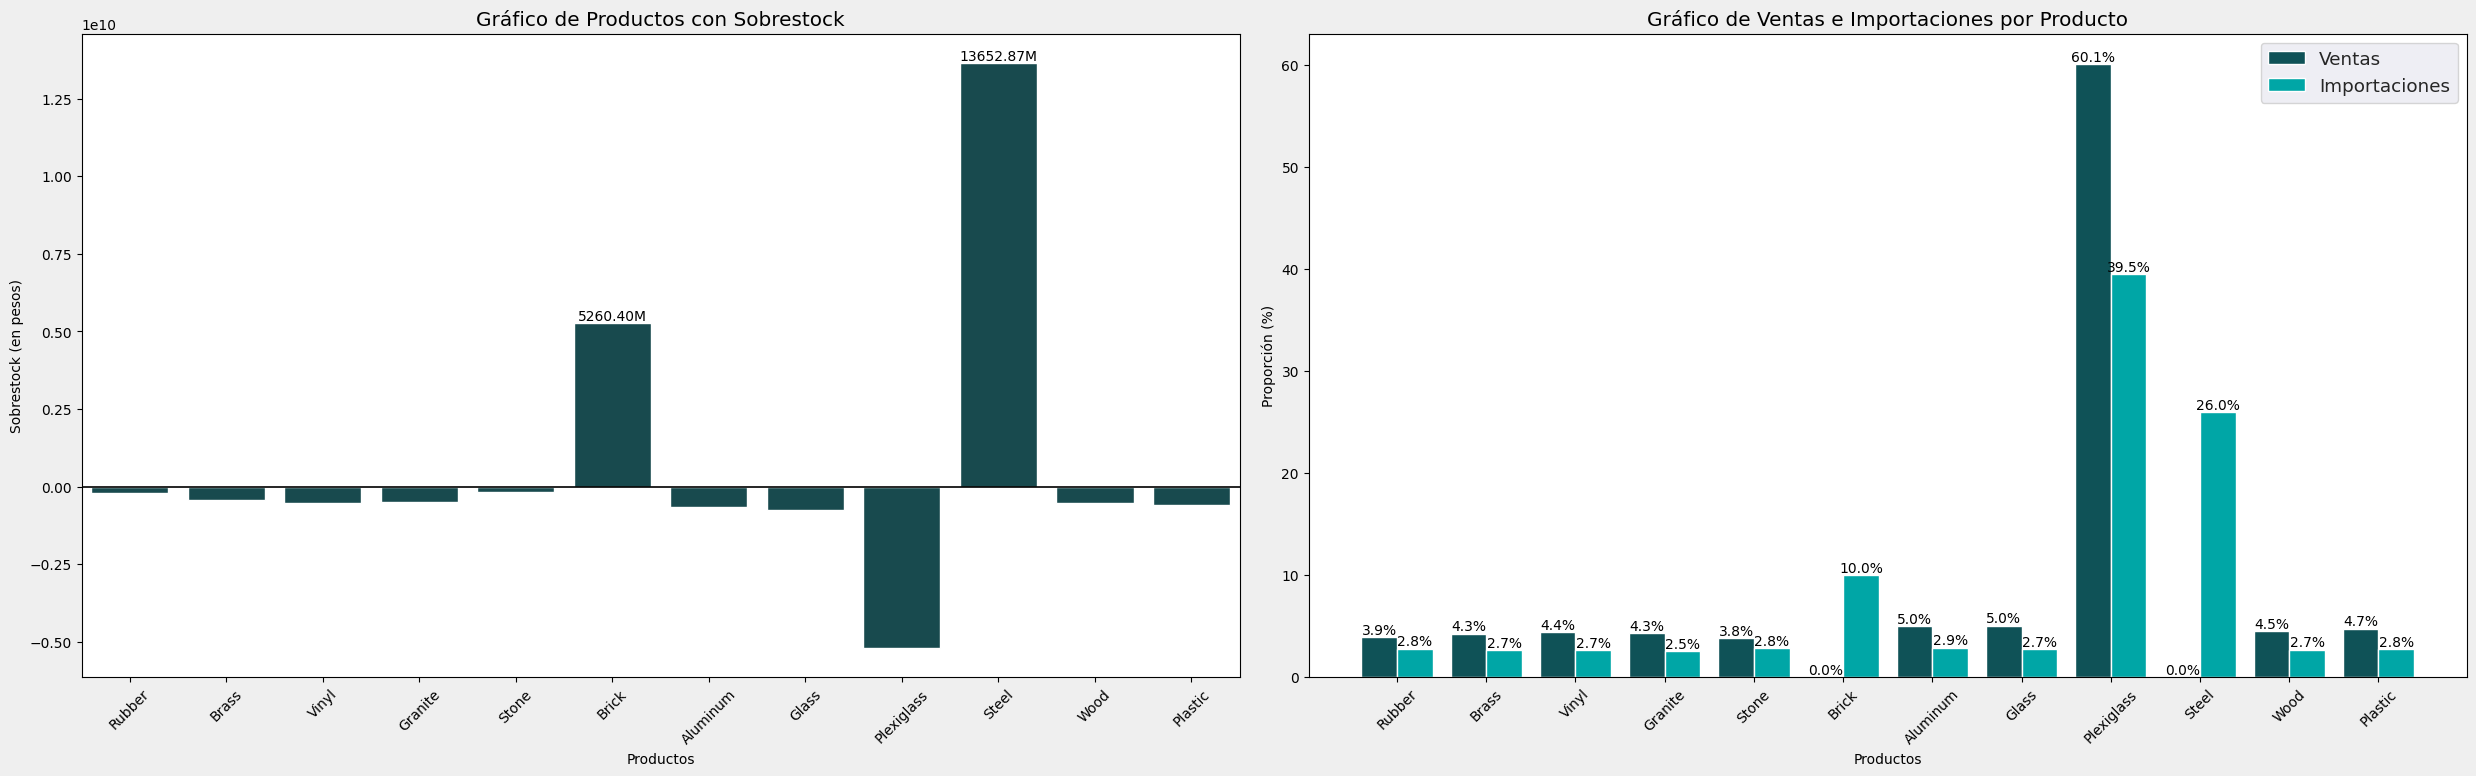

In [ ]:
# Calcular proporciones de ventas e importaciones
proporcion_ventas = (suma_produc_venta / suma_produc_venta.sum()) * 100
proporcion_importaciones = (suma_produc_expor / suma_produc_expor.sum()) * 100

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

# Configurar la estética general de los gráficos
sns.set(style='dark', palette='dark', font="sans-serif", font_scale=1.2)

# Configurar colores de fondo
fig.set_facecolor('#EFEFEF')

# Formato de los números
def format_number(value):
    if value >= 1e6:
        return f'{value/1e6:.2f}M'
    elif value >= 1e3:
        return f'{value/1e3:.2f}K'
    return f'{value:.2f}'

# Gráfico de Barras productos por sobrestock
barplot = sns.barplot(x=sobrestock_por_producto.index, y=sobrestock_por_producto.values, color='#0F5257', ax=ax1, dodge=True)
for i, value in enumerate(sobrestock_por_producto.values):
    if value >= 0:  # Solo mostrar etiquetas para valores positivos
        ax1.text(i, value, format_number(value), ha='center', va='bottom', fontsize=10, color='black')
ax1.axhline(0, color='black', linewidth=1.2, linestyle='-')  # Línea del cero
ax1.set_title('Gráfico de Productos con Sobrestock')
ax1.set_xlabel('Productos')
ax1.set_ylabel('Sobrestock (en pesos)')

# Fijar las posiciones de los ticks
ax1.set_xticks(range(len(sobrestock_por_producto.index)))
ax1.set_xticklabels(sobrestock_por_producto.index, rotation=45)

# Crear el gráfico de barras agrupadas
bar_width = 0.4
indices = range(len(suma_produc_venta.index))

# Dibujar las barras de ventas
bars1 = ax2.bar(indices, proporcion_ventas, bar_width, label='Ventas', color='#0F5257')

# Dibujar las barras de importaciones al lado de las de ventas
bars2 = ax2.bar([i + bar_width for i in indices], proporcion_importaciones, bar_width, label='Importaciones', color='#00A6A6')

# Añadir etiquetas de porcentaje sobre las barras de ventas
for bar in bars1:
    height = bar.get_height()
    if height >= 0:  # Solo mostrar etiquetas para valores no negativos
        ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Añadir etiquetas de porcentaje sobre las barras de importaciones
for bar in bars2:
    height = bar.get_height()
    if height >= 0:  # Solo mostrar etiquetas para valores no negativos
        ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Configurar etiquetas y título
ax2.set_xlabel('Productos')
ax2.set_ylabel('Proporción (%)')
ax2.set_title('Gráfico de Ventas e Importaciones por Producto')
ax2.set_xticks([i + bar_width / 2 for i in indices])
ax2.set_xticklabels(suma_produc_venta.index, rotation=45)
ax2.legend()

# Ajustar el diseño para que no se corten las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# **Conclusión del Análisis**

A partir del análisis de los datos proporcionados sobre las ventas y las exportaciones en Paraguay, hemos identificado un problema significativo en la estrategia de CMM.

El análisis de las exportaciones en comparación con las ventas revela un sobrestock considerable. La diferencia total entre el valor de las exportaciones y las ventas es de $61.92B lo que indica un exceso significativo de productos en el mercado paraguayo.

Los productos con los mayores excesos de inventario son:

*   Steel con un exceso de $13652.87M

*   Brick  con  un exceso de $5260.40M



